In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.interpolate as interpolate

In [3]:
df_llama = pd.read_csv('../metric_files/llama-3-8B-instruct-zero-shot-24-permutations .csv')
df_mistral = pd.read_csv('../metric_files/mistral-7B-instruct-v0.3-24-permutations.csv')
df_gemma = pd.read_csv('../metric_files/gemma-2-9b-it-24-permutations .csv')

In [28]:
postions_column = [i % 4 for i in range(len(df_llama))]
for model in {"llama", "gemma", "mistral"}:
    exec(f"df_{model}['position'] = postions_column")

In [29]:
llama_average_label_accuracy = df_llama.groupby(['Permutation','position'])['Accuracy'].mean().reset_index()
gemma_average_label_accuracy = df_gemma.groupby(['Permutation','position'])['Accuracy'].mean().reset_index()
mistral_average_label_accuracy = df_mistral.groupby(['Permutation','position'])['Accuracy'].mean().reset_index()


### Heatmap for Label Accuracy

The following code generates a heatmap that displays label accuracy based on different positions for various content types.

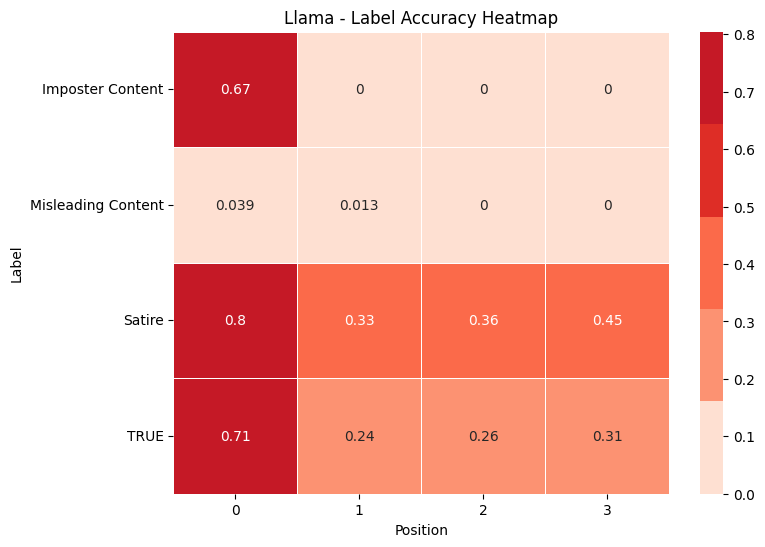

In [30]:
heatmap_data = llama_average_label_accuracy.pivot(index='Permutation', columns='position', values='Accuracy')

# Draw the heatmap
plt.figure(figsize=(8, 6))
cmap = sns.color_palette(["#fee0d2", "#fc9272", "#fb6a4a", "#de2d26", "#c51926"])
sns.heatmap(heatmap_data, annot=True, cmap=cmap, linewidths=.5)
plt.title('Llama - Label Accuracy Heatmap')
plt.ylabel('Label')
plt.xlabel('Position')
# plt.yticks([])
plt.show()

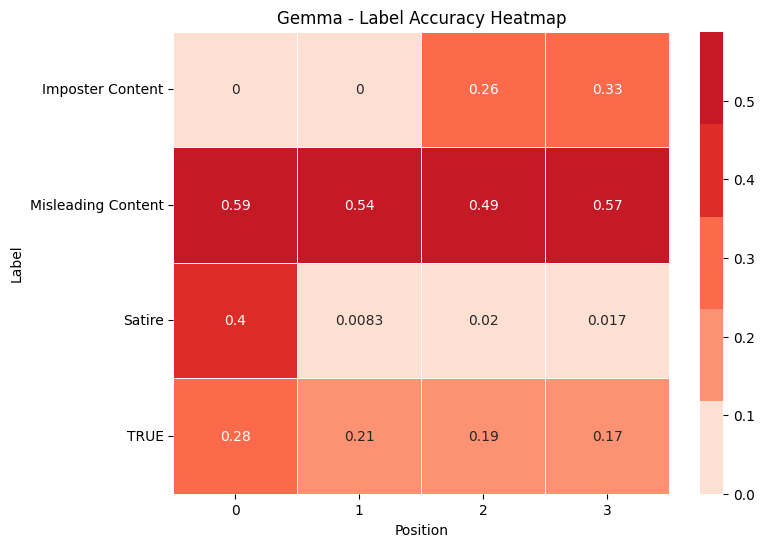

In [12]:
heatmap_data = gemma_average_label_accuracy.pivot(index='Permutation', columns='position', values='Accuracy')

# Draw the heatmap
plt.figure(figsize=(8, 6))
cmap = sns.color_palette(["#fee0d2", "#fc9272", "#fb6a4a", "#de2d26", "#c51926"])
sns.heatmap(heatmap_data, annot=True, cmap=cmap, linewidths=.5)
plt.title('Gemma - Label Accuracy Heatmap')
plt.ylabel('Label')
plt.xlabel('Position')
# plt.yticks([])
plt.show()

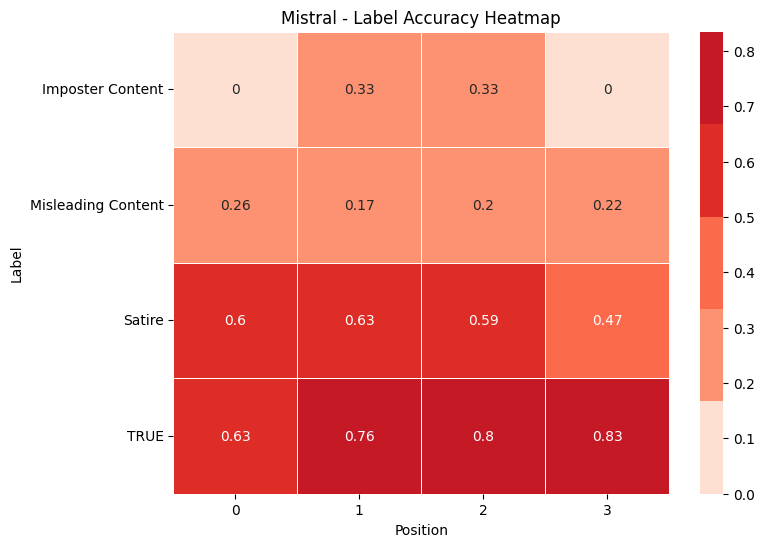

In [13]:
heatmap_data = mistral_average_label_accuracy.pivot(index='Permutation', columns='position', values='Accuracy')

# Draw the heatmap
plt.figure(figsize=(8, 6))
cmap = sns.color_palette(["#fee0d2", "#fc9272", "#fb6a4a", "#de2d26", "#c51926"])
sns.heatmap(heatmap_data, annot=True, cmap=cmap, linewidths=.5)
plt.title('Mistral - Label Accuracy Heatmap')
plt.ylabel('Label')
plt.xlabel('Position')
# plt.yticks([])
plt.show()


### Bar Chart - Average Accuracy of Labels by Position

The following code generates a bar chart that visualizes the average accuracy of labels by different positions.

/var/folders/lh/k3syq58j3618dzxwptqsy0kc0000gn/T/ipykernel_4283/3251913790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='Accuracy', data=llama_average_accuracy_by_position, palette=cmap_bar)
/var/folders/lh/k3syq58j3618dzxwptqsy0kc0000gn/T/ipykernel_4283/3251913790.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='position', y='Accuracy', data=llama_average_accuracy_by_position, palette=cmap_bar)


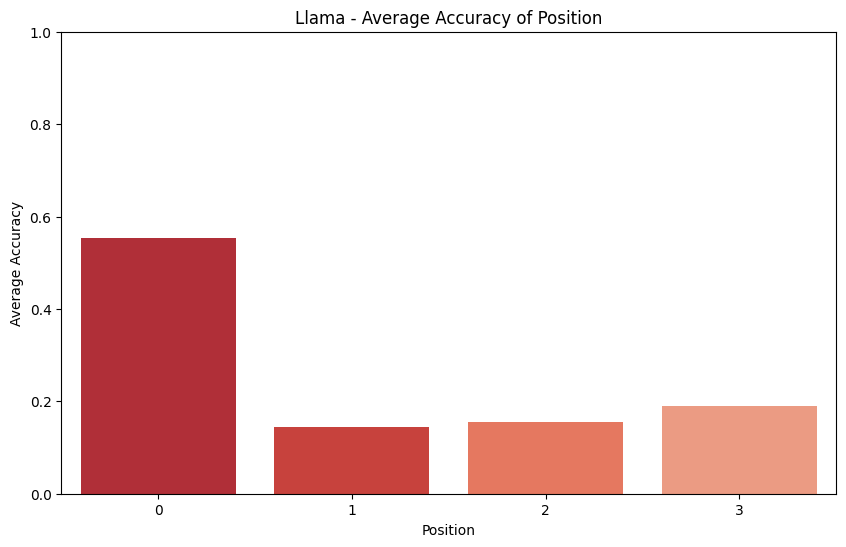

In [24]:
llama_average_accuracy_by_position = df_llama.groupby('position')['Accuracy'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
cmap_bar = sns.color_palette(["#c51926", "#de2d26", "#fb6a4a", "#fc9272", "#fee0d2"])
sns.barplot(x='position', y='Accuracy', data=llama_average_accuracy_by_position, palette=cmap_bar)

plt.title('Llama - Average Accuracy of Position')
plt.xlabel('Position')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for better comparison
plt.show()

/var/folders/lh/k3syq58j3618dzxwptqsy0kc0000gn/T/ipykernel_4283/1770142741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='Accuracy', data=gemma_average_accuracy_by_position, palette=cmap_bar)
/var/folders/lh/k3syq58j3618dzxwptqsy0kc0000gn/T/ipykernel_4283/1770142741.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='position', y='Accuracy', data=gemma_average_accuracy_by_position, palette=cmap_bar)


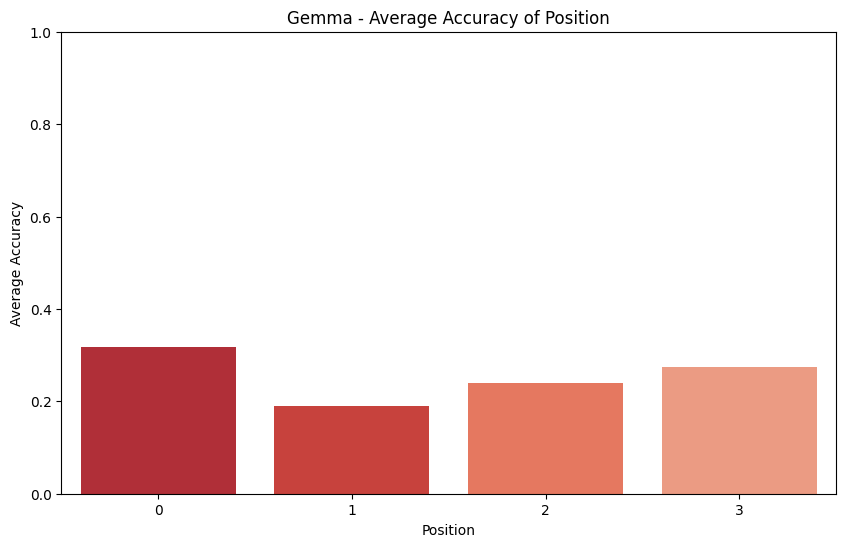

In [25]:
gemma_average_accuracy_by_position = df_gemma.groupby('position')['Accuracy'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
cmap_bar = sns.color_palette(["#c51926", "#de2d26", "#fb6a4a", "#fc9272", "#fee0d2"])
sns.barplot(x='position', y='Accuracy', data=gemma_average_accuracy_by_position, palette=cmap_bar)

plt.title('Gemma - Average Accuracy of Position')
plt.xlabel('Position')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for better comparison
plt.show()

/var/folders/lh/k3syq58j3618dzxwptqsy0kc0000gn/T/ipykernel_4283/2101626430.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='Accuracy', data=mistral_average_accuracy_by_position, palette=cmap_bar)
/var/folders/lh/k3syq58j3618dzxwptqsy0kc0000gn/T/ipykernel_4283/2101626430.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='position', y='Accuracy', data=mistral_average_accuracy_by_position, palette=cmap_bar)


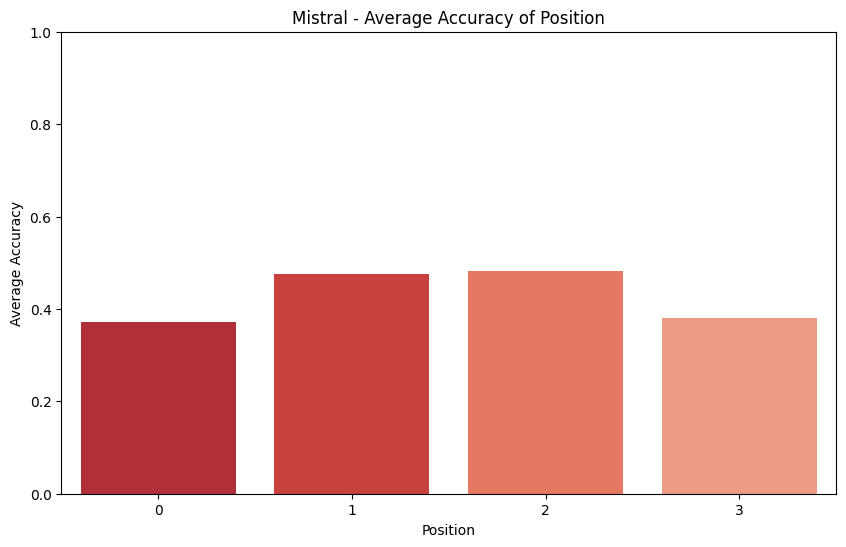

In [26]:
mistral_average_accuracy_by_position = df_mistral.groupby('position')['Accuracy'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
cmap_bar = sns.color_palette(["#c51926", "#de2d26", "#fb6a4a", "#fc9272", "#fee0d2"])
sns.barplot(x='position', y='Accuracy', data=mistral_average_accuracy_by_position, palette=cmap_bar)

plt.title('Mistral - Average Accuracy of Position')
plt.xlabel('Position')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for better comparison
plt.show()

### Line Plot - Average Accuracy by Position for Multiple Models

The following code generates a line plot that visualizes the average accuracy by position for three different models: Llama, Gemma, and Mistral.

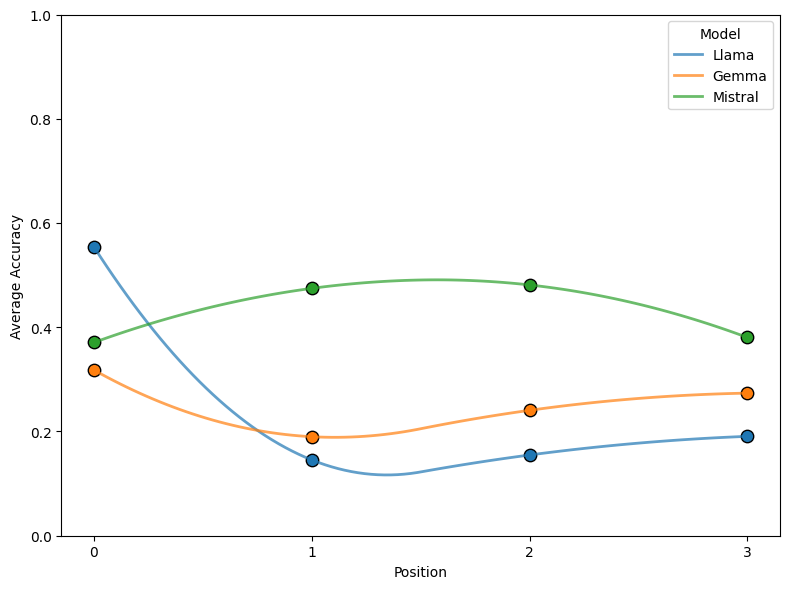

In [27]:
llama_average_accuracy_by_position['model'] = 'Llama'
gemma_average_accuracy_by_position['model'] = 'Gemma'
mistral_average_accuracy_by_position['model'] = 'Mistral'

combined_df = pd.concat([llama_average_accuracy_by_position, gemma_average_accuracy_by_position, mistral_average_accuracy_by_position])


plt.figure(figsize=(8, 6))

palette = {"Llama": "#1f77b4", "Gemma": "#ff7f0e", "Mistral": "#2ca02c"}

# Plot the data with less smooth curves using interpolation
for model in combined_df['model'].unique():
    model_data = combined_df[combined_df['model'] == model]
    
    # Interpolation to make the line less smooth
    xnew = np.linspace(model_data['position'].min(), model_data['position'].max(), 100) 
    spl = interpolate.make_interp_spline(model_data['position'], model_data['Accuracy'], k=2)  # Spline of degree 2
    y_smooth = spl(xnew)
    
    # Plot the smooth line
    plt.plot(xnew, y_smooth, label=model, color=palette[model], linewidth=2, alpha=0.7)
    
    # Add markers for the original data points
    plt.scatter(model_data['position'], model_data['Accuracy'], color=palette[model], s=80, edgecolor='black')

plt.xlabel('Position')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1) 
plt.xticks([0, 1, 2, 3]) 
plt.legend(title='Model')
plt.grid(False)  # Remove the grid
plt.tight_layout()  
plt.show()